In [1]:
import numpy as np; np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

Text(0, 0.5, 'Average number (20 runs) of agents that survived')

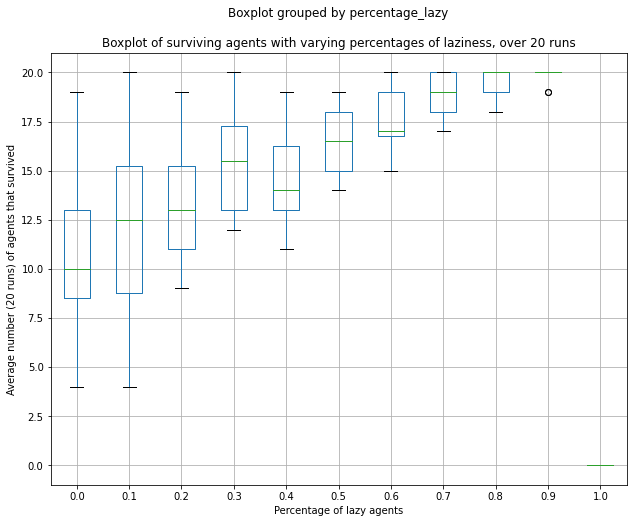

In [2]:
df = pd.read_csv('log.csv', names=['percentage_lazy', 'num_agents','avg_health' ])
df['adjusted_fitness'] = (df['num_agents'] * df['avg_health']) / 20
df.head()

# grouped = df.groupby(['percentage_lazy']).mean()


fig, ax = plt.subplots(figsize=(10,8))

df.boxplot(column=['num_agents'], by='percentage_lazy', ax=ax)
ax.set_title("Boxplot of surviving agents with varying percentages of laziness, over 20 runs")
ax.set_xlabel("Percentage of lazy agents")
ax.set_ylabel("Average number (20 runs) of agents that survived")

Text(0, 0.5, 'Average health (20 runs) of agents that survived')

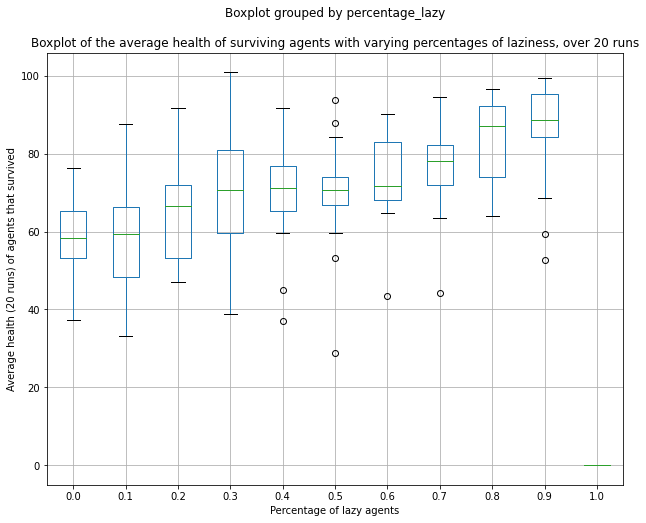

In [3]:
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column=['avg_health'], by='percentage_lazy', ax=ax)
ax.set_title("Boxplot of the average health of surviving agents with varying percentages of laziness, over 20 runs")
ax.set_xlabel("Percentage of lazy agents")
ax.set_ylabel("Average health (20 runs) of agents that survived")

Text(0, 0.5, 'Fitness (20 runs) of agents that survived')

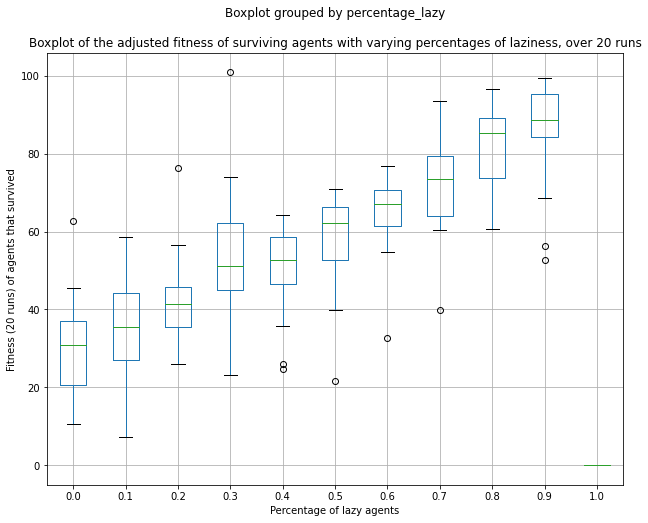

In [4]:
fig, ax = plt.subplots(figsize=(10,8))
df.boxplot(column=['adjusted_fitness'], by='percentage_lazy', ax=ax)
ax.set_title("Boxplot of the adjusted fitness of surviving agents with varying percentages of laziness, over 20 runs")
ax.set_xlabel("Percentage of lazy agents")
ax.set_ylabel("Fitness (20 runs) of agents that survived")

In [5]:
grouped_multiple = df.groupby(['percentage_lazy']).agg({'num_agents': ['median']})
grouped_multiple.columns = ['num_agents_mean']
grouped_multiple = grouped_multiple.reset_index()

grouped_multiple

,percentage_lazy,num_agents_mean
0,0.0,10.0
1,0.1,12.5
2,0.2,13.0
3,0.3,15.5
4,0.4,14.0
5,0.5,16.5
6,0.6,17.0
7,0.7,19.0
8,0.8,20.0
9,0.9,20.0


In [6]:
grouped_multiple_ = df.groupby(['percentage_lazy']).agg({'adjusted_fitness': ['median']})
grouped_multiple_.columns = ['fitness']
grouped_multiple_ = grouped_multiple_.reset_index()

grouped_multiple_

,percentage_lazy,fitness
0,0.0,30.914097
1,0.1,35.615764
2,0.2,41.306875
3,0.3,51.178472
4,0.4,52.636780
5,0.5,62.212452
6,0.6,67.072725
7,0.7,73.615654
8,0.8,85.223746
9,0.9,88.765490


In [13]:
df.groupby(['percentage_lazy'])['adjusted_fitness'].describe()

,count,mean,std,min,25%,50%,75%,max
percentage_lazy,,,,,,,,
0.0,20.0,30.893173,12.400331,10.703194,20.505660,30.914097,36.974852,62.645278
0.1,20.0,35.025107,13.080770,7.266667,26.945590,35.615764,44.111215,58.501310
0.2,20.0,42.021694,11.283249,25.929167,35.382188,41.306875,45.694792,76.307500
0.3,20.0,54.179770,16.465253,23.273750,44.914122,51.178472,62.173179,100.904167
0.4,20.0,50.422020,11.268462,24.810000,46.435521,52.636780,58.605596,64.204798
0.5,20.0,57.917804,12.207382,21.636111,52.800625,62.212452,66.334263,70.846061
0.6,20.0,65.162739,9.703118,32.605536,61.564191,67.072725,70.627083,76.794095
0.7,20.0,71.902360,11.371455,39.873889,63.927768,73.615654,79.509179,93.496250
0.8,20.0,80.957179,10.728151,60.719327,73.864886,85.223746,89.121446,96.732288


In [14]:
df.groupby(['percentage_lazy'])['num_agents'].describe()

,count,mean,std,min,25%,50%,75%,max
percentage_lazy,,,,,,,,
0.0,20.0,10.60,3.816860,4.0,8.50,10.0,13.00,19.0
0.1,20.0,12.15,4.545385,4.0,8.75,12.5,15.25,20.0
0.2,20.0,13.10,3.076225,9.0,11.00,13.0,15.25,19.0
0.3,20.0,15.60,2.741494,12.0,13.00,15.5,17.25,20.0
0.4,20.0,14.35,2.390221,11.0,13.00,14.0,16.25,19.0
0.5,20.0,16.55,1.791060,14.0,15.00,16.5,18.00,19.0
0.6,20.0,17.60,1.500877,15.0,16.75,17.0,19.00,20.0
0.7,20.0,18.80,1.105013,17.0,18.00,19.0,20.00,20.0
0.8,20.0,19.60,0.680557,18.0,19.00,20.0,20.00,20.0


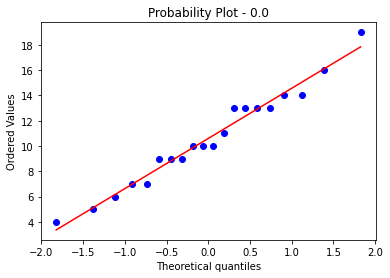

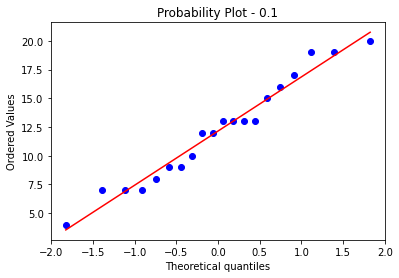

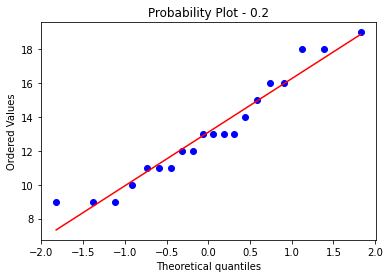

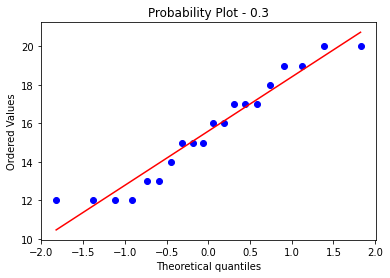

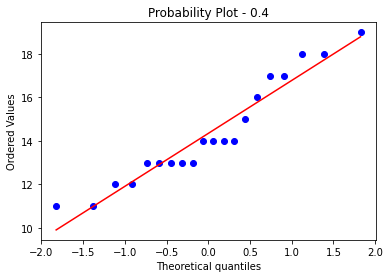

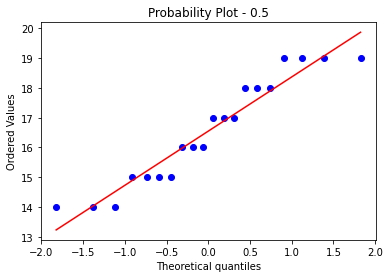

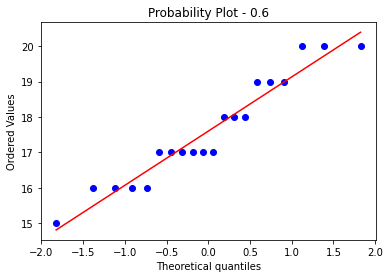

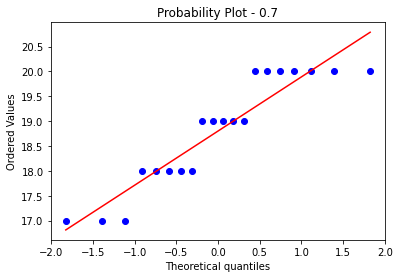

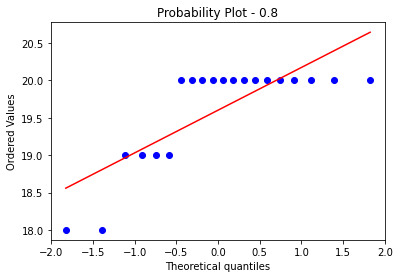

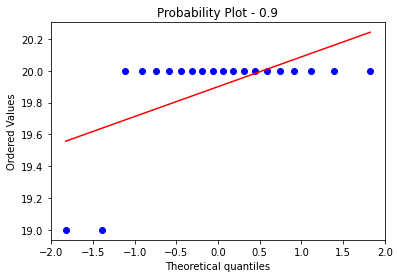

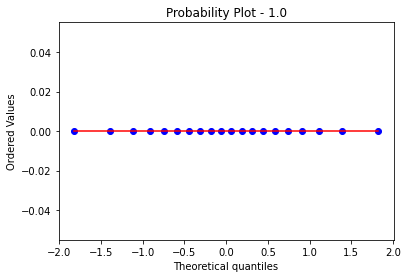

In [8]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_selfishness = df['percentage_lazy'].unique()
for major in unique_selfishness:
    stats.probplot(df[df['percentage_lazy'] == major]['num_agents'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()

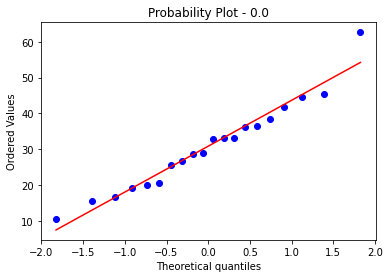

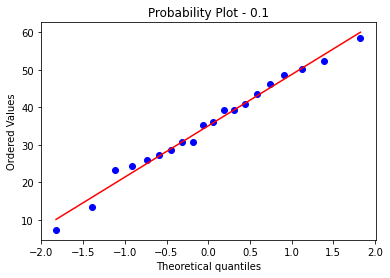

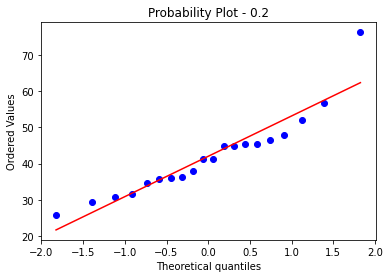

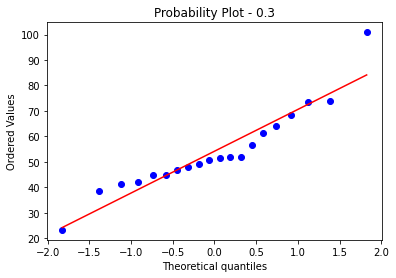

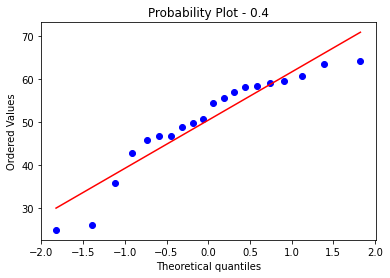

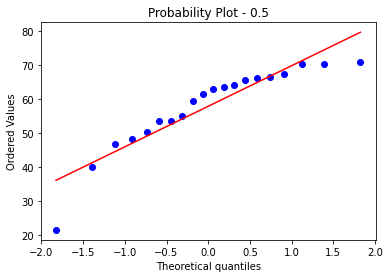

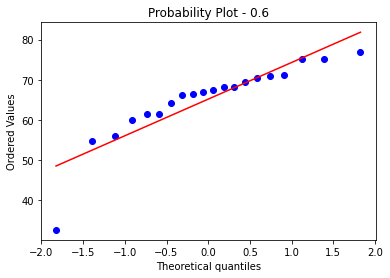

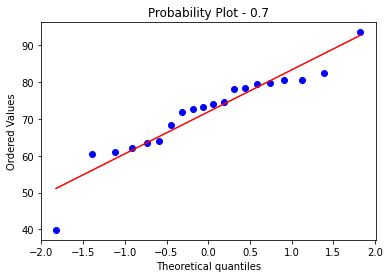

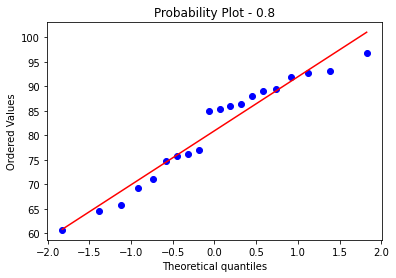

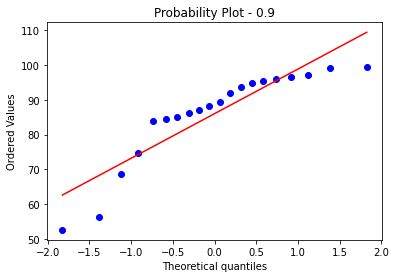

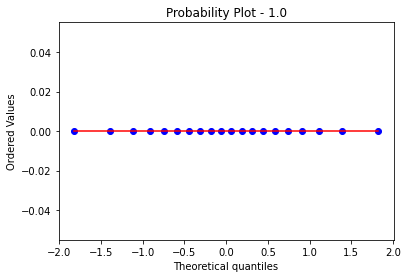

In [9]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_selfishness = df['percentage_lazy'].unique()
for major in unique_selfishness:
    stats.probplot(df[df['percentage_lazy'] == major]['adjusted_fitness'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()

# poisson

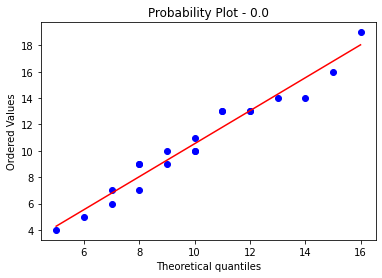

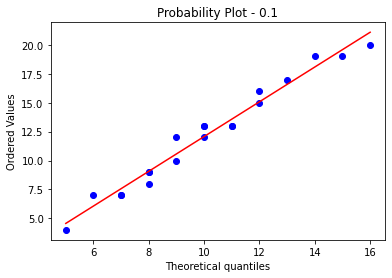

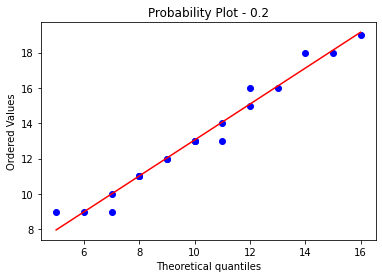

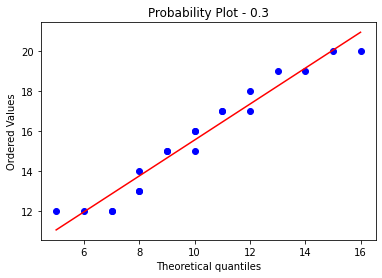

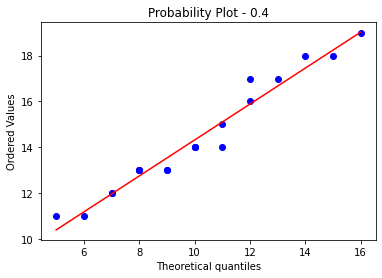

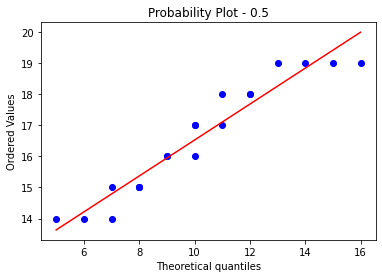

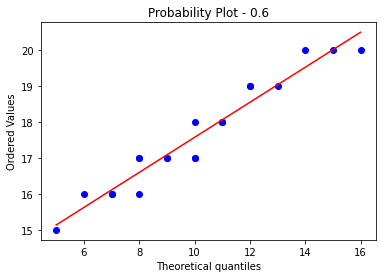

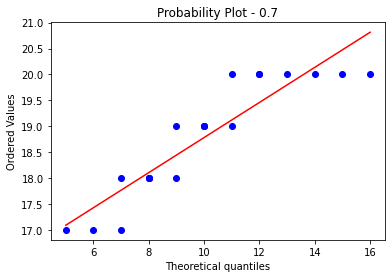

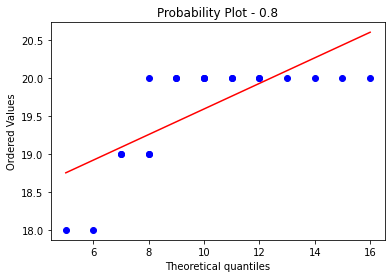

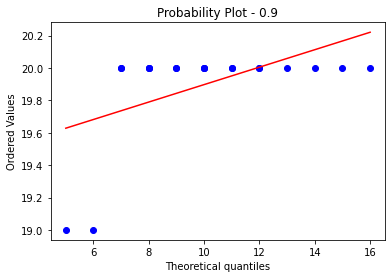

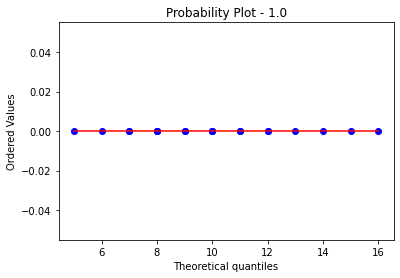

In [10]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_selfishness = df['percentage_lazy'].unique()
for major in unique_selfishness:
    stats.probplot(df[df['percentage_lazy'] == major]['num_agents'], dist=stats.poisson(mu=10), plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()

In [11]:
ratio = df.groupby('percentage_lazy').std().max() / df.groupby('percentage_lazy').std().min()
ratio

num_agents          inf
avg_health          inf
adjusted_fitness    inf
dtype: float64

In [12]:
df = df.loc[df['percentage_lazy'] != 1]

In [67]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = df['num_agents'].mean()
SSTR = df.groupby('percentage_lazy').count() * (df.groupby('percentage_lazy').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['num_agents'].sum()

# calculate SSE and update anova table
SSE = (df.groupby('percentage_lazy').count() - 1) * df.groupby('percentage_lazy').std()**2
anova_table['SS']['Within Groups'] = SSE['num_agents'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['num_agents'].sum() + SSE['num_agents'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = df['percentage_lazy'].nunique() - 1
anova_table['df']['Within Groups'] = df.shape[0] - df['percentage_lazy'].nunique()
anova_table['df']['Total'] = df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,1876.83,9,208.536,32.0034,1.11022e-16,2.18139
Within Groups,1238.05,190,6.51605,,,
Total,3114.88,199,15.6526,,,


In [68]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 32.00344179242448  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 32.00344179242448  and critical value is: 2.18138775462775
Null Hypothesis is rejected.


In [69]:
df

,percentage_lazy,num_agents,avg_health,adjusted_fitness
0,0.0,7,54.730952,19.155833
1,0.0,10,65.861944,32.930972
2,0.0,9,37.258951,16.766528
3,0.0,9,56.819444,25.568750
4,0.0,7,76.272619,26.695417
...,...,...,...,...
195,0.9,20,93.715278,93.715278
196,0.9,20,85.017361,85.017361
197,0.9,19,59.375000,56.406250
198,0.9,20,88.254868,88.254868


In [70]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = df['adjusted_fitness'].mean()
SSTR = df.groupby('percentage_lazy').count() * (df.groupby('percentage_lazy').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['adjusted_fitness'].sum()

# calculate SSE and update anova table
SSE = (df.groupby('percentage_lazy').count() - 1) * df.groupby('percentage_lazy').std()**2
anova_table['SS']['Within Groups'] = SSE['adjusted_fitness'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['adjusted_fitness'].sum() + SSE['adjusted_fitness'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = df['percentage_lazy'].nunique() - 1
anova_table['df']['Within Groups'] = df.shape[0] - df['percentage_lazy'].nunique()
anova_table['df']['Total'] = df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,62863.3,9,6984.82,46.0708,1.11022e-16,2.18139
Within Groups,28806,190,151.61,,,
Total,91669.3,199,460.65,,,


In [71]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 46.07084048994027  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 46.07084048994027  and critical value is: 2.18138775462775
Null Hypothesis is rejected.


In [72]:
bins = [0, 0.4, 0.6]
names = ['low', 'medium', 'high']

d = dict(enumerate(names, 1))

df['lazy_range'] = np.vectorize(d.get)(np.digitize(df['percentage_lazy'], bins))

<ipython-input-72-bbe6271e93f5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lazy_range'] = np.vectorize(d.get)(np.digitize(df['percentage_lazy'], bins))


In [73]:
df.loc[120:130]

,percentage_lazy,num_agents,avg_health,adjusted_fitness,lazy_range
120,0.6,20,66.127937,66.127937,high
121,0.6,20,71.264881,71.264881,high
122,0.6,17,75.512002,64.185201,high
123,0.6,16,88.756771,71.005417,high
124,0.6,15,43.474048,32.605536,high
125,0.6,16,69.884226,55.907381,high
126,0.6,17,90.345994,76.794095,high
127,0.6,17,72.395098,61.535833,high
128,0.6,19,70.865497,67.322222,high
129,0.6,18,66.746961,60.072265,high


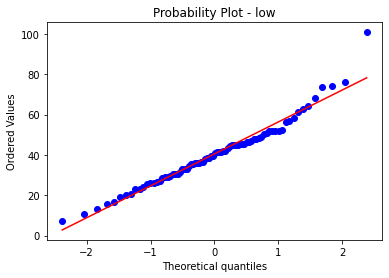

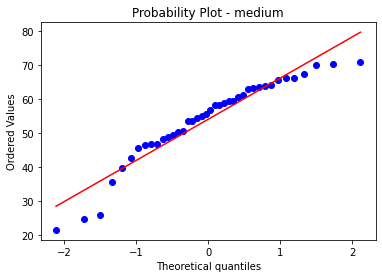

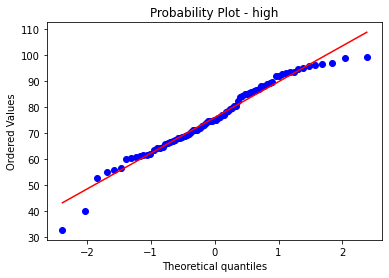

In [74]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

unique_selfishness = df['lazy_range'].unique()
for major in unique_selfishness:
    stats.probplot(df[df['lazy_range'] == major]['adjusted_fitness'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(major))
    plt.show()

In [75]:
ratio = df.groupby('lazy_range').std().max() / df.groupby('lazy_range').std().min()
ratio

percentage_lazy     2.221871
num_agents          2.995158
avg_health          1.175851
adjusted_fitness    1.303315
dtype: float64

In [76]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = df['num_agents'].mean()
SSTR = df.groupby('lazy_range').count() * (df.groupby('lazy_range').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['num_agents'].sum()

# calculate SSE and update anova table
SSE = (df.groupby('lazy_range').count() - 1) * df.groupby('lazy_range').std()**2
anova_table['SS']['Within Groups'] = SSE['num_agents'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['num_agents'].sum() + SSE['num_agents'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = df['lazy_range'].nunique() - 1
anova_table['df']['Within Groups'] = df.shape[0] - df['lazy_range'].nunique()
anova_table['df']['Total'] = df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,1501.54,2,750.769,91.6742,1.11022e-16,3.75883
Within Groups,1613.34,197,8.18953,,,
Total,3114.88,199,15.6526,,,


In [77]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 91.67421184346114  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 91.67421184346114  and critical value is: 3.7588251784051874
Null Hypothesis is rejected.


In [78]:
# Create ANOVA backbone table
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = df['adjusted_fitness'].mean()
SSTR = df.groupby('lazy_range').count() * (df.groupby('lazy_range').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['adjusted_fitness'].sum()

# calculate SSE and update anova table
SSE = (df.groupby('lazy_range').count() - 1) * df.groupby('lazy_range').std()**2
anova_table['SS']['Within Groups'] = SSE['adjusted_fitness'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['adjusted_fitness'].sum() + SSE['adjusted_fitness'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = df['lazy_range'].nunique() - 1
anova_table['df']['Within Groups'] = df.shape[0] - df['lazy_range'].nunique()
anova_table['df']['Total'] = df.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,50886.5,2,25443.3,122.903,1.11022e-16,3.75883
Within Groups,40782.8,197,207.019,,,
Total,91669.3,199,460.65,,,


In [79]:
# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['P-value']['Between Groups'] <= alpha:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and p value is:", anova_table['P-value']['Between Groups'])    
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
conclusion = "Failed to reject the null hypothesis."
if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
    conclusion = "Null Hypothesis is rejected."
print("F-score is:", anova_table['F']['Between Groups'], " and critical value is:", anova_table['F crit']['Between Groups'])
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
F-score is: 122.90280557528487  and p value is: 1.1102230246251565e-16
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
F-score is: 122.90280557528487  and critical value is: 3.7588251784051874
Null Hypothesis is rejected.


In [80]:
df

,percentage_lazy,num_agents,avg_health,adjusted_fitness,lazy_range
0,0.0,7,54.730952,19.155833,low
1,0.0,10,65.861944,32.930972,low
2,0.0,9,37.258951,16.766528,low
3,0.0,9,56.819444,25.568750,low
4,0.0,7,76.272619,26.695417,low
...,...,...,...,...,...
195,0.9,20,93.715278,93.715278,high
196,0.9,20,85.017361,85.017361,high
197,0.9,19,59.375000,56.406250,high
198,0.9,20,88.254868,88.254868,high


In [81]:
from scipy import stats

df3 = df[['lazy_range', 'num_agents']]

x = df3.loc[df['lazy_range'] == 'low']['num_agents'].tolist()
y = df3.loc[df['lazy_range'] == 'medium']['num_agents'].tolist()
z = df3.loc[df['lazy_range'] == 'high']['num_agents'].tolist()

stats.kruskal(x, y, z)

data = [x, y, z]

import scikit_posthocs as sp
sp.posthoc_dunn(data, p_adjust = 'bonferroni')

,1,2,3
1,1.000000e+00,5.634290e-02,8.660751e-24
2,5.634290e-02,1.000000e+00,8.114960e-09
3,8.660751e-24,8.114960e-09,1.000000e+00


In [82]:
from scipy import stats

df2 = df[['lazy_range', 'adjusted_fitness']]

x = df2.loc[df['lazy_range'] == 'low']['adjusted_fitness'].tolist()
y = df2.loc[df['lazy_range'] == 'medium']['adjusted_fitness'].tolist()
z = df2.loc[df['lazy_range'] == 'high']['adjusted_fitness'].tolist()

stats.kruskal(x, y, z)

data = [x, y, z]

import scikit_posthocs as sp
sp.posthoc_dunn(data, p_adjust = 'bonferroni')

,1,2,3
1,1.000000e+00,2.374200e-03,1.585992e-26
2,2.374200e-03,1.000000e+00,1.689210e-07
3,1.585992e-26,1.689210e-07,1.000000e+00
